# ----------------------------------------------------------------------
##         RUBic :  Result Analysis and Visualization
# ----------------------------------------------------------------------

In [143]:
import csv,os,json,numpy as np
import struct
from numpy import *
from pathlib import Path
import subprocess
# from Bio import SeqIO
from zipfile import ZipFile
import subprocess
# import matplotlib.pyplot as plt
import seaborn as sns
from pylab import savefig
import networkx as nx
import numpy as np
import pickle
import random
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
import load_matrix_data as LMD
import ParseCluster as PC
import PlotHeatmap as PH
random_items = lambda lst, n: random.sample(lst, n)

## Cluster Vidualization On sample small dataset

In [219]:
dataSample='/home/anuphalder/WORK-AKH/BiClustering/ARBic/data/ecoli_colombos/SBMat.txt'
dmat=LMD.read_matrix_from_csv(dataSample)
compute_c = lambda x: [val - 1 for val in x]

n,m=dmat.shape
opFile= '/home/anuphalder/WORK-AKH/BiClustering/ARBic/data/ecoli_colombos/resultRB.txt'
dummyRB=PC.parse_RB(opFile)

## Sample Data Matrix

----------25-30--------------


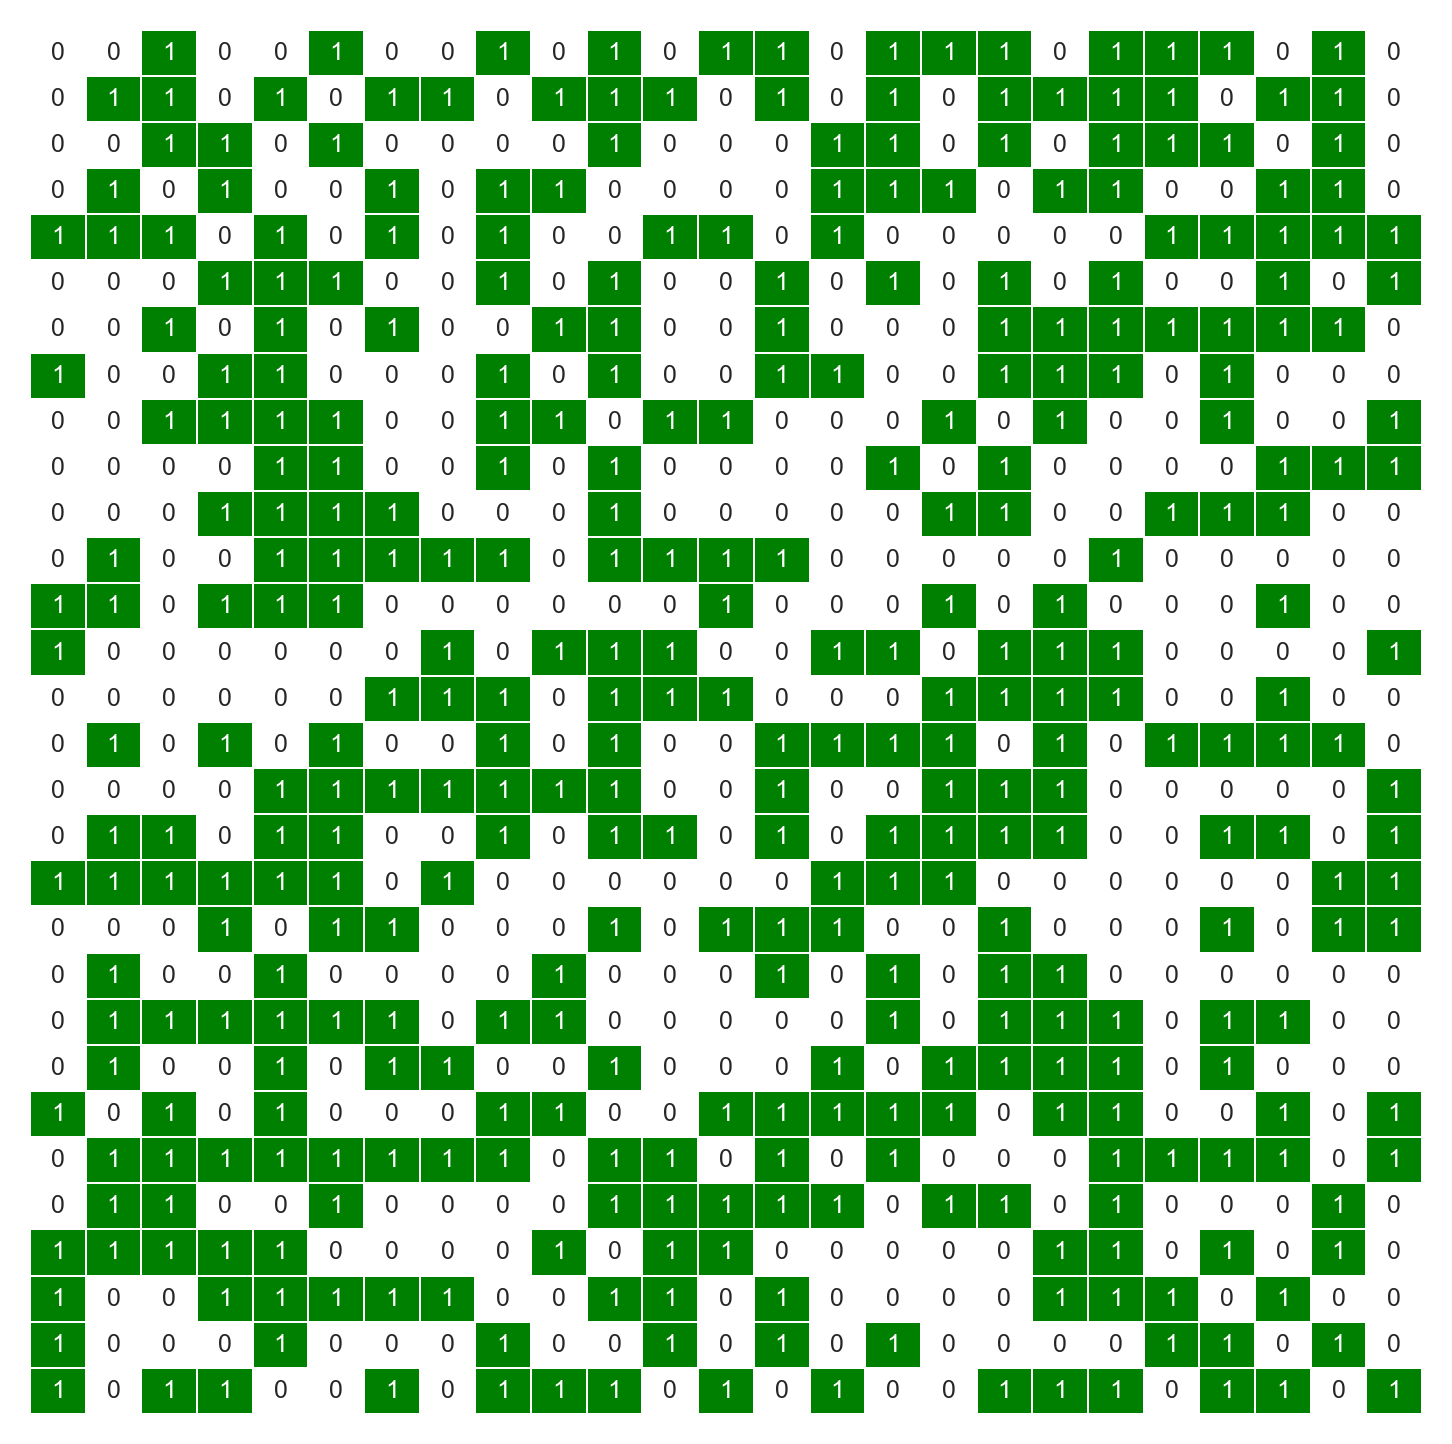

In [223]:

ffin=f'{figp}BC1'
border_color = "white"  # Border color for specified rows and columns
PH.draw_heatmap(dmat,  r, c, border_color,m,n,ffin)

## Sample Output Text: RUBIC

In [187]:
text='''
bc#: 1
 c: 20 21 24 
 r: 1 2 3 
 Total col=3, Total row=3
 bc#: 2
 c: 3 6 11 18 20 21 24 
 r: 1 3 
 Total col=7, Total row=2
 bc#: 3
 c: 3 9 21 24 
 r: 1 5 
 Total col=4, Total row=2
 bc#: 4
 c: 6 9 11 14 18 20 
 r: 1 6 
 Total col=6, Total row=2
 bc#: 5
 c: 3 21 24 
 r: 1 7 3 5 
 Total col=3, Total row=4
 bc#: 6
 c: 6 9 11 18 24 
 r: 1 10 
 Total col=5, Total row=2
 bc#: 7
 c: 6 11 17 18 21 
 r: 1 11 
 Total col=5, Total row=2
 bc#: 8
 c: 6 17 
 r: 1 13 11 16 17 18 19 
 Total col=2, Total row=7
 bc#: 9
 c: 16 17 18 20 21 
 r: 1 14 
 Total col=5, Total row=2
 bc#: 10
 c: 9 11 17 18 20 
 r: 1 15 
 Total col=5, Total row=2
 bc#: 11
 c: 6 9 11 14 17 21 24 
 r: 1 16 
 Total col=7, Total row=2
 bc#: 12
 c: 6 9 11 14 17 18 
 r: 1 17 18 
 Total col=6, Total row=3
 bc#: 13
 c: 3 6 9 11 14 17 18 
 r: 1 18 
 Total col=7, Total row=2
 bc#: 14
 c: 3 6 17 24 
 r: 1 19 
 Total col=4, Total row=2
 bc#: 15
 c: 14 18 
 r: 1 21 6 17 18 
 Total col=2, Total row=5
 ...........................................
  '''

## Cluster Vidualization On sample small dataset

55 :, R :[4, 5, 9, 17, 23], C: [4, 8, 22, 24]
----------25-30--------------


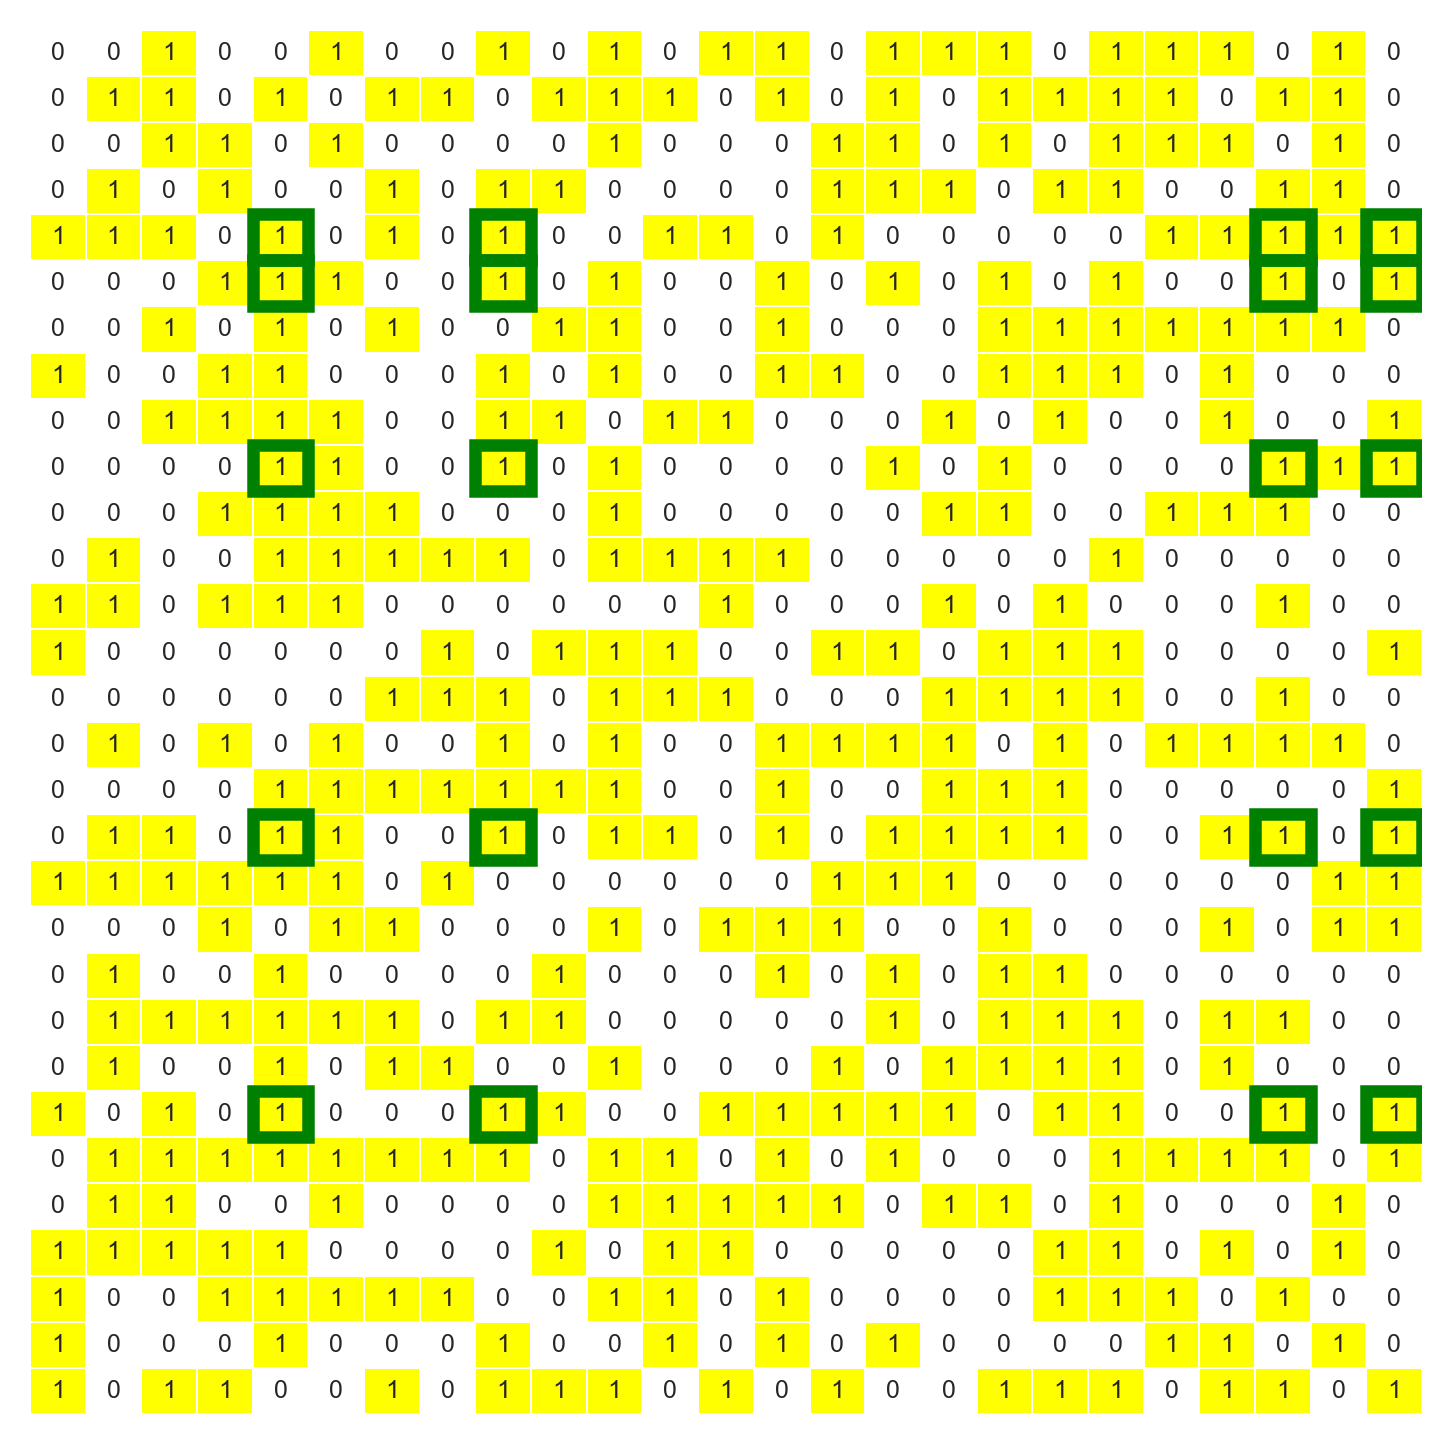

78 :, R :[5, 10, 9, 17], C: [4, 5, 10, 17, 22]
----------25-30--------------


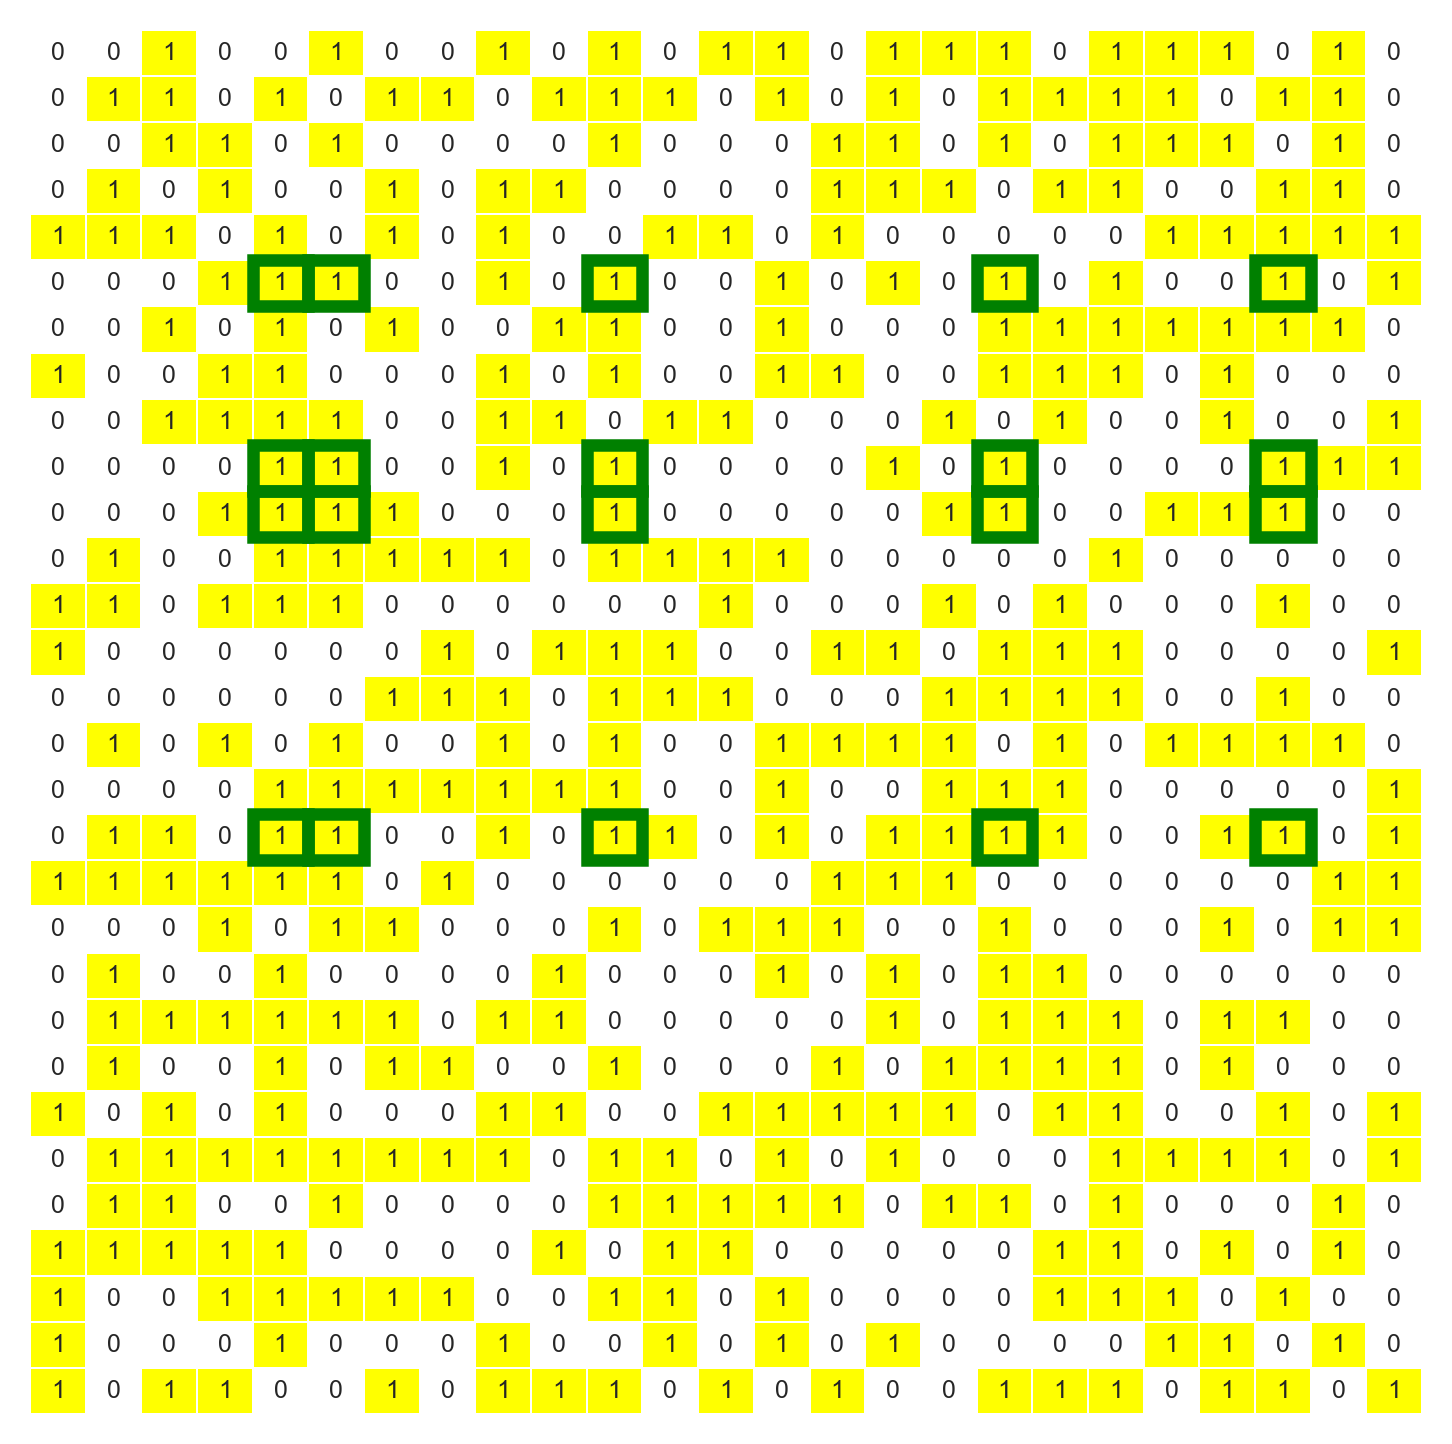

98 :, R :[9, 14, 5, 17, 29], C: [8, 10, 17, 22]
----------25-30--------------


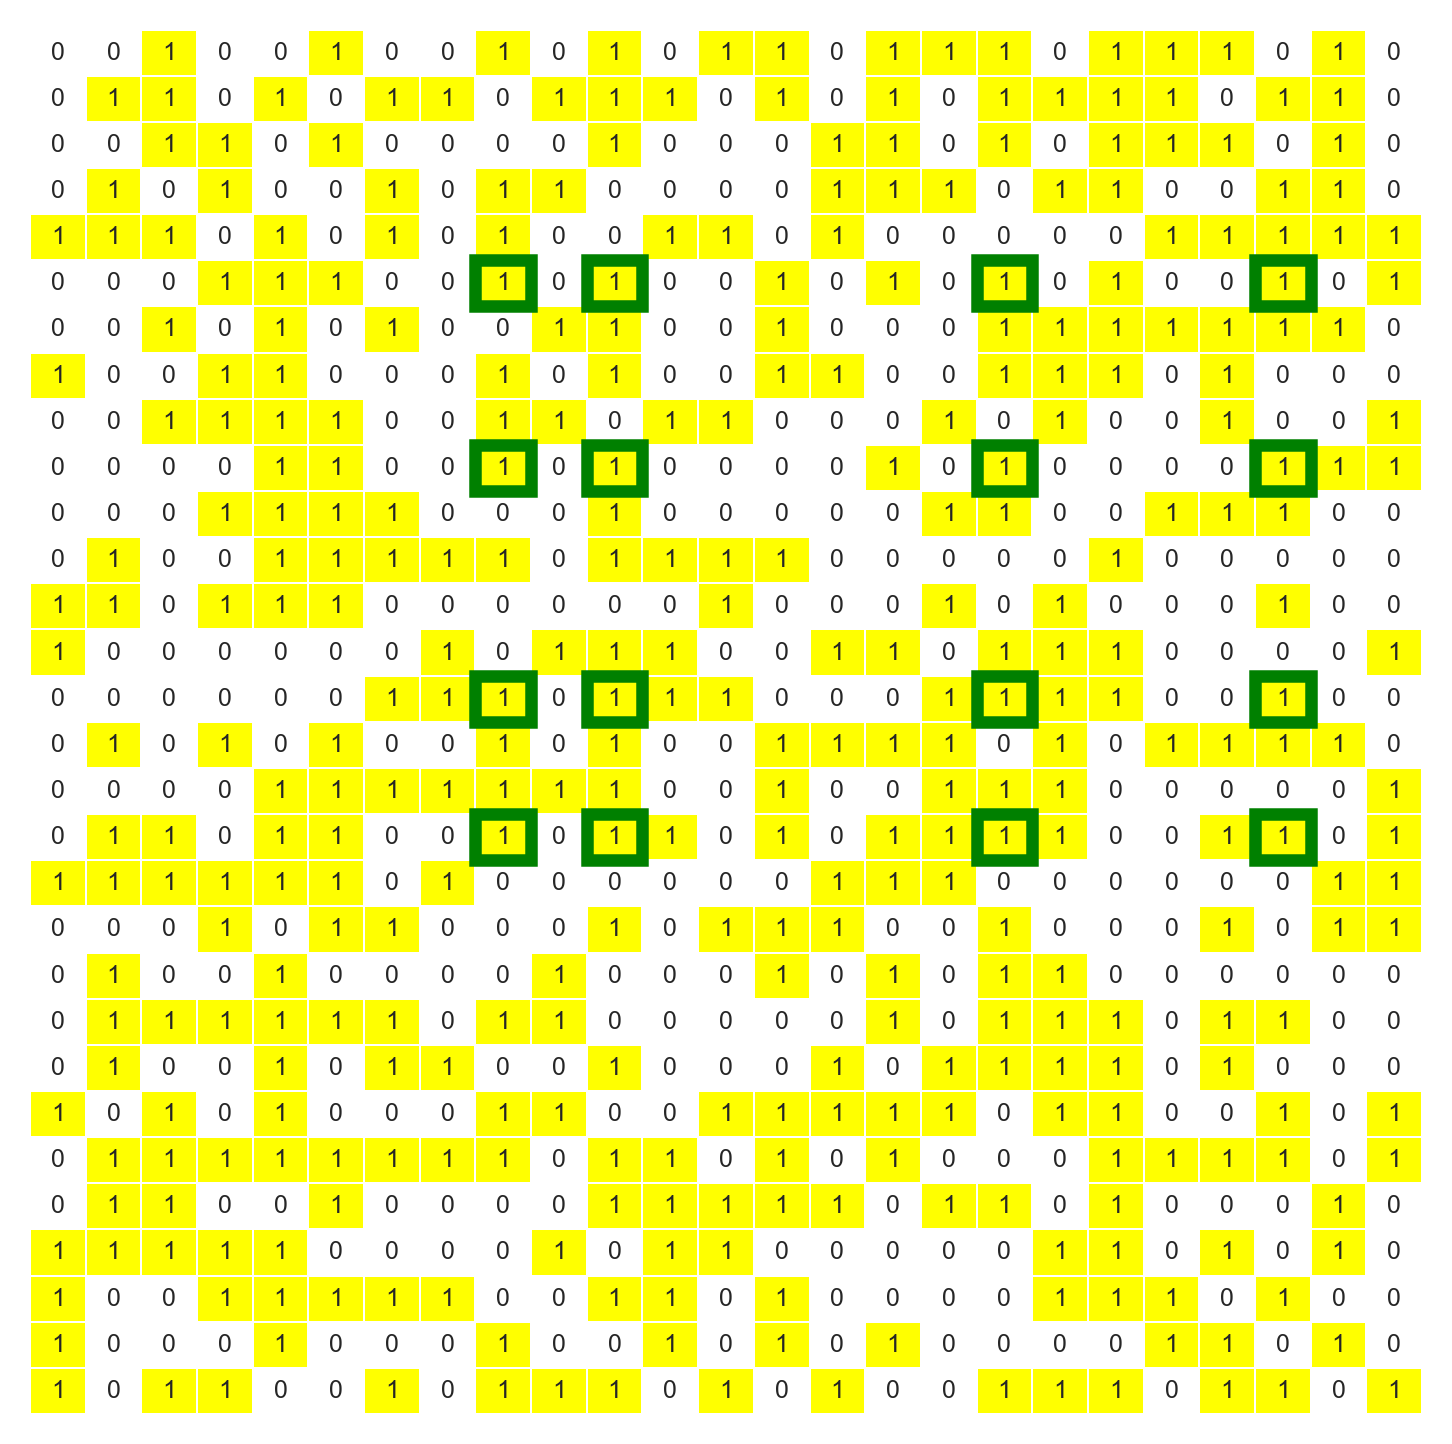

100 :, R :[9, 16, 5, 17], C: [4, 5, 8, 10, 17, 24]
----------25-30--------------


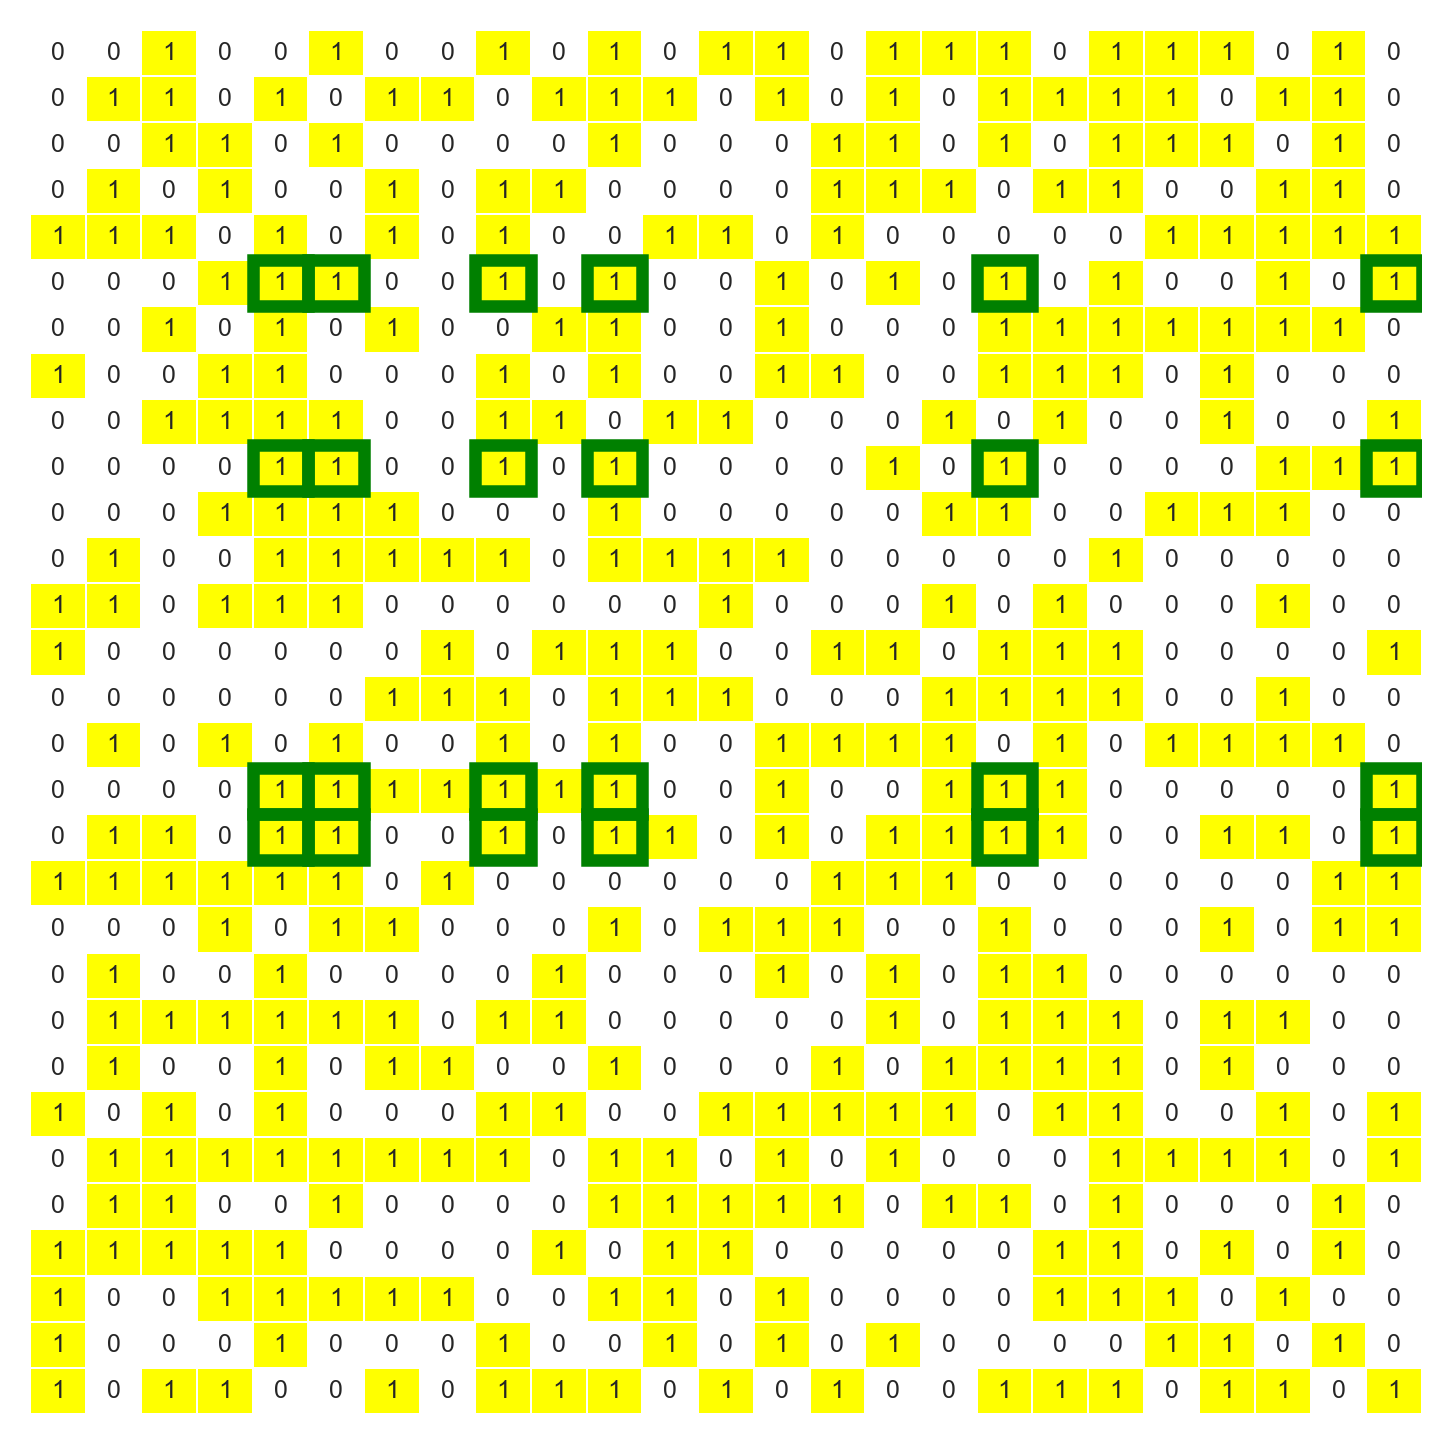

108 :, R :[9, 29, 5, 17], C: [8, 10, 17, 22, 24]
----------25-30--------------


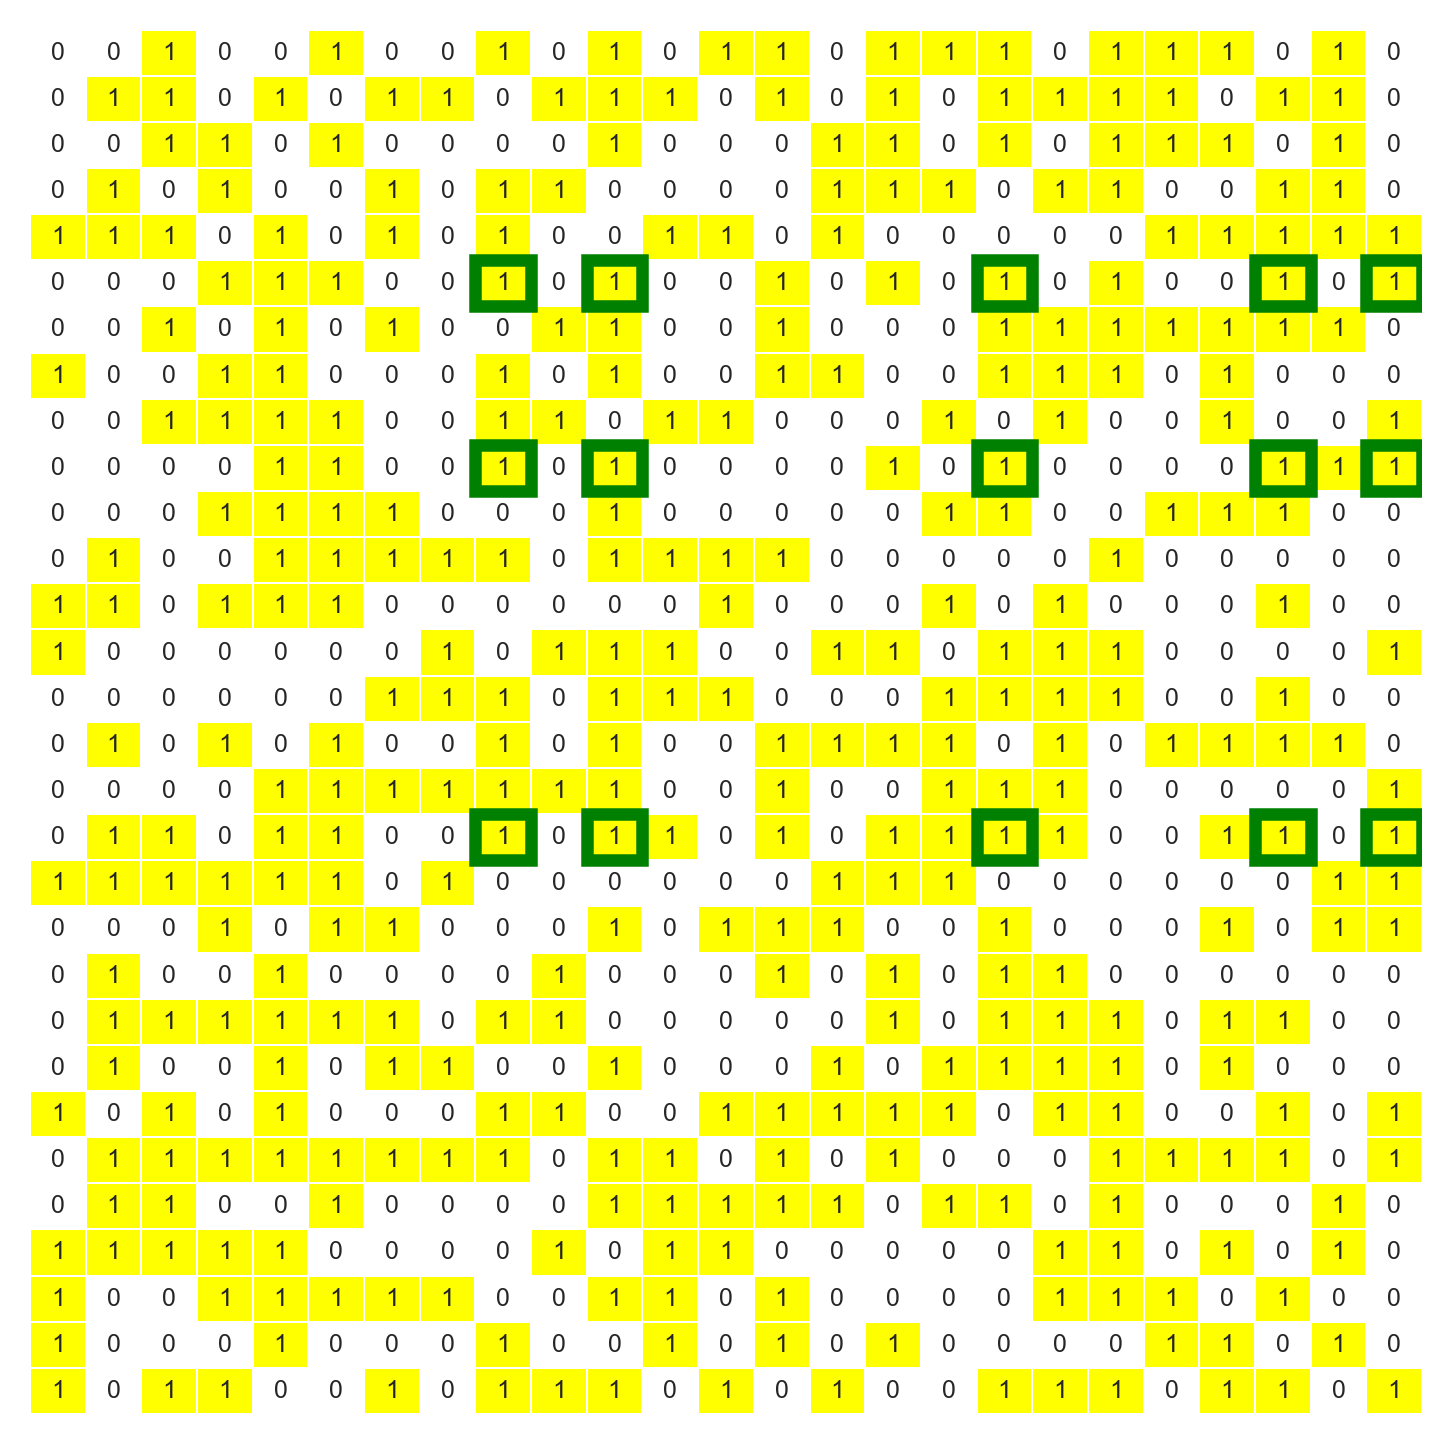

185 :, R :[18, 29, 4, 23], C: [0, 2, 14, 24]
----------25-30--------------


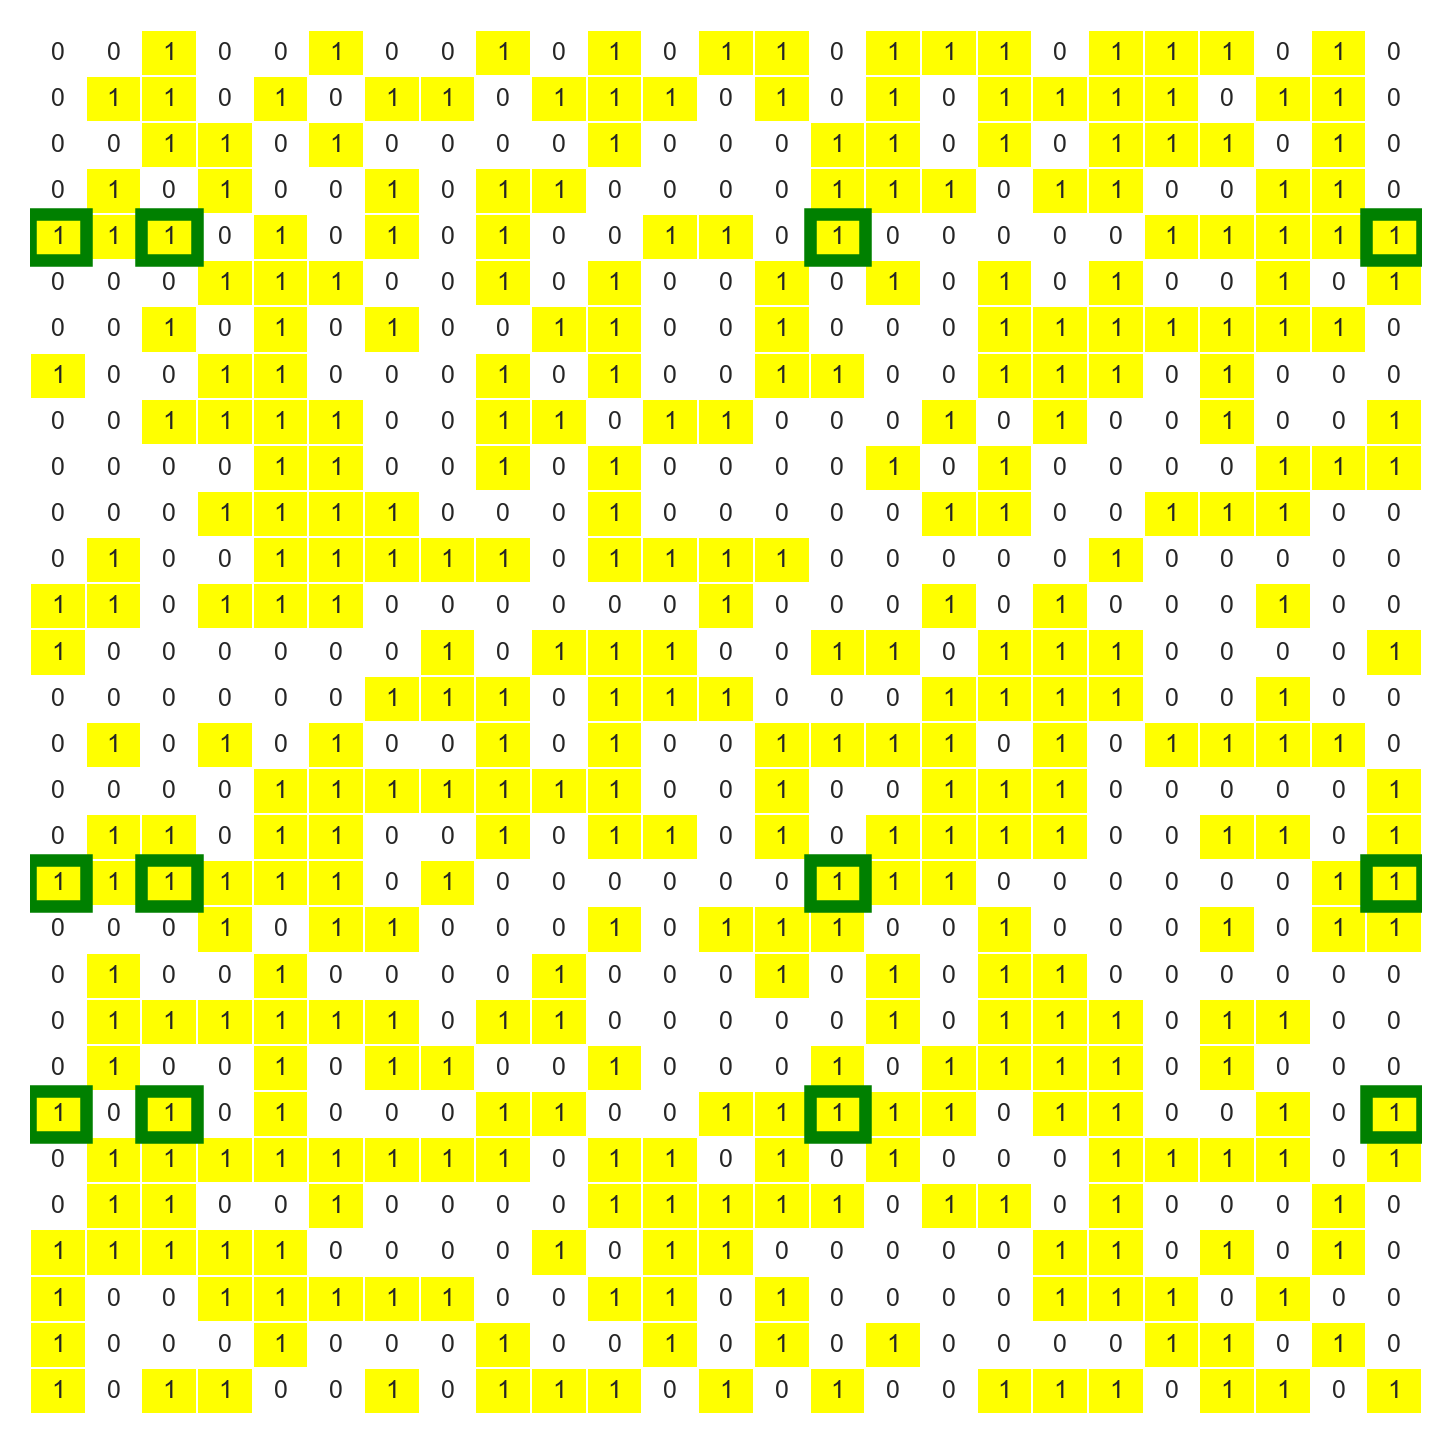

In [225]:
for clid in dummyRB :
    clName=clid['bc#']
    
    
    c=compute_c(clid['c'])
    r=compute_c(clid['r'])
    if len(c)>3 and len(r)>3: #Only vidualise some clusters
        print(f'{clName} :, R :{r}, C: {c}')
        ffin=f'{figp}BC1'
        border_color = "green"  # Border color for specified rows and columns
        PH.draw_heatmap(dmat,  r, c, border_color,m,n,ffin)

#         if int(clName)==3:break

# Data File Path

In [7]:
Root = Path(os.getcwd())
filePath="{}/data/".format(Root)
FPL = [name for name in os.listdir(filePath) if os.path.isdir(os.path.join(filePath, name))]# and not name.startswith('.')]

for k in FPL:
    print(k)


yeast_gpl2529
ecoli_colombos
ecoli_dream5
yeast_dream5
human_seek_gpl5175


## Data index Dictionary 

In [8]:
with open(f'{filePath}/BicDataDic.json','r') as f:
    GeneLD = json.load(f)
print('-------------------After Binarization--------------------------')  

for k in GeneLD:
    print(f'-------------{k}-------------')
    for kk in GeneLD[k]:
        if kk=='geneD':continue
        print(kk,len(GeneLD[k][kk]))


-------------------After Binarization--------------------------
-------------yeast_gpl2529-------------
gene 7843
condt 3025
-------------ecoli_colombos-------------
gene 4939
condt 2470
-------------ecoli_dream5-------------
gene 5211
condt 805
-------------yeast_dream5-------------
gene 7354
condt 536
-------------human_seek_gpl5175-------------
gene 12413
condt 2308


# (Example data: ecoli_colombos)

In [30]:
datasetName= 'ecoli_colombos'

## Load Data Matrix 

In [13]:
print('-----------------Expression data----------------')
expFile=f'{filePath}{datasetName}/E_T.tsv'
matrixE,ConE,GenesE,ExpMat = LMD.load_matrix_from_file_charsExp(expFile)
print('-----------------Binary data--------------------')
binaFile=f'{filePath}{datasetName}/E_T.tsv.chars'
matrixI,ConI,GenesI,BinMat = LMD.load_matrix_from_file_chars(binaFile)

-----------------Expression data----------------
Rows: 2093, Col: 2470
-----------------Binary data--------------------
Rows: 4939, Col: 2470


## Load kegg data

In [42]:
keggPath=f'{filePath}{datasetName}/gsets/kegg.pkl'
with open(keggPath, 'rb') as file:
    KeggN = pickle.load(file)
# print(len(KeggN))
KeggCL=(KeggN['eco02020'])
print(f'eco02020  Gene:{len(KeggCL)}')

eco02020  Gene:66


In [43]:
indextoID = lambda cl, D: list(set(map(lambda x: D[str(x-1)].split('_')[0], cl['r'])))
def getGeneAR(ICL):
    Xdr={};ic=0
    for k in ICL:
        
        Agl=list(set([x.split('_')[0] for x in ICL[k]['genes']]))
        Xdr[ic]=Agl
        ic+=1
    return Xdr
def getGeneIDRB(RB,GD):
    RBC={}
    for cli in RB:
        Genel=indextoID(cli,GD)
        #list(set([GD[str(x-1)].split('_')[0] for x in cli['r']]))
        RBC[int(cli['bc#'])-1]=Genel
    return RBC

In [159]:

GD=GeneLD[datasetName]['gene']

print(f"{datasetName} : Gene Len: {len(GD)}")
##  Result files
rname='akhETFB48.txt'
qname='E_T.tsv.chars.blocks'
arname='E_T.tsv.chars.cblocks'

ffq=f'{filePath}{datasetName}/RESULTFILE/QUBIC/{qname}'
ffa=f'{filePath}{datasetName}/RESULTFILE/ARBIC/{arname}'
fff=f'{filePath}{datasetName}/RESULTFILE/RUBIC/{rname}' 

RBI=getGeneIDRB(PC.parse_RB(fff),GD)
QBCL=getGeneAR(PC.parse_QB(ffq))
ARCL=getGeneAR(PC.parse_QB(ffa))
print(f'ARBIC Clusters: {len(ARCL)}')
print(f'QUBic Clusters: {len(QBCL)}')
print(f'RUBIC Clusters: {len(RBI)}')


ecoli_colombos : Gene Len: 4939
ARBIC Clusters: 268
QUBic Clusters: 2870
RUBIC Clusters: 598


In [182]:
def findtopCl(CLR,KeggCL):
    max_rf = -1 ;max_r1f = -1  # Initialize the maximum rf to a very low value
    best_ci = None  # Initialize the best ci as None
    sislen=-1
    for ci in CLR:
        SIS = set(CLR[ci]) & set(KeggCL)
        rf =  (len(SIS) / len(CLR[ci])) 
        r1f= (len(SIS) / len(KeggCL)) 
        if rf > max_rf and r1f>0.25:# len(SIS)>20:
            max_rf = rf;max_r1f=r1f
            best_ci = ci
            sislen=len(SIS)
    print(f"The Cluster id:  {best_ci}, max [rf : { max_rf:4f}, rf : { max_r1f:4f}], SIS-len {sislen}, cl len: {len(CLR[best_ci])}")
    return best_ci

In [183]:
Rtop  = findtopCl(RBI,KeggCL)
Qtop  = findtopCl(QBCL,KeggCL)
Artop = findtopCl(ARCL,KeggCL)

The Cluster id:  538, max [rf : 0.850000, rf : 0.515152], SIS-len 34, cl len: 40
The Cluster id:  0, max [rf : 0.200000, rf : 0.272727], SIS-len 18, cl len: 90
The Cluster id:  267, max [rf : 0.358025, rf : 0.439394], SIS-len 29, cl len: 81


# Heatmap Plots

(66, 2470)


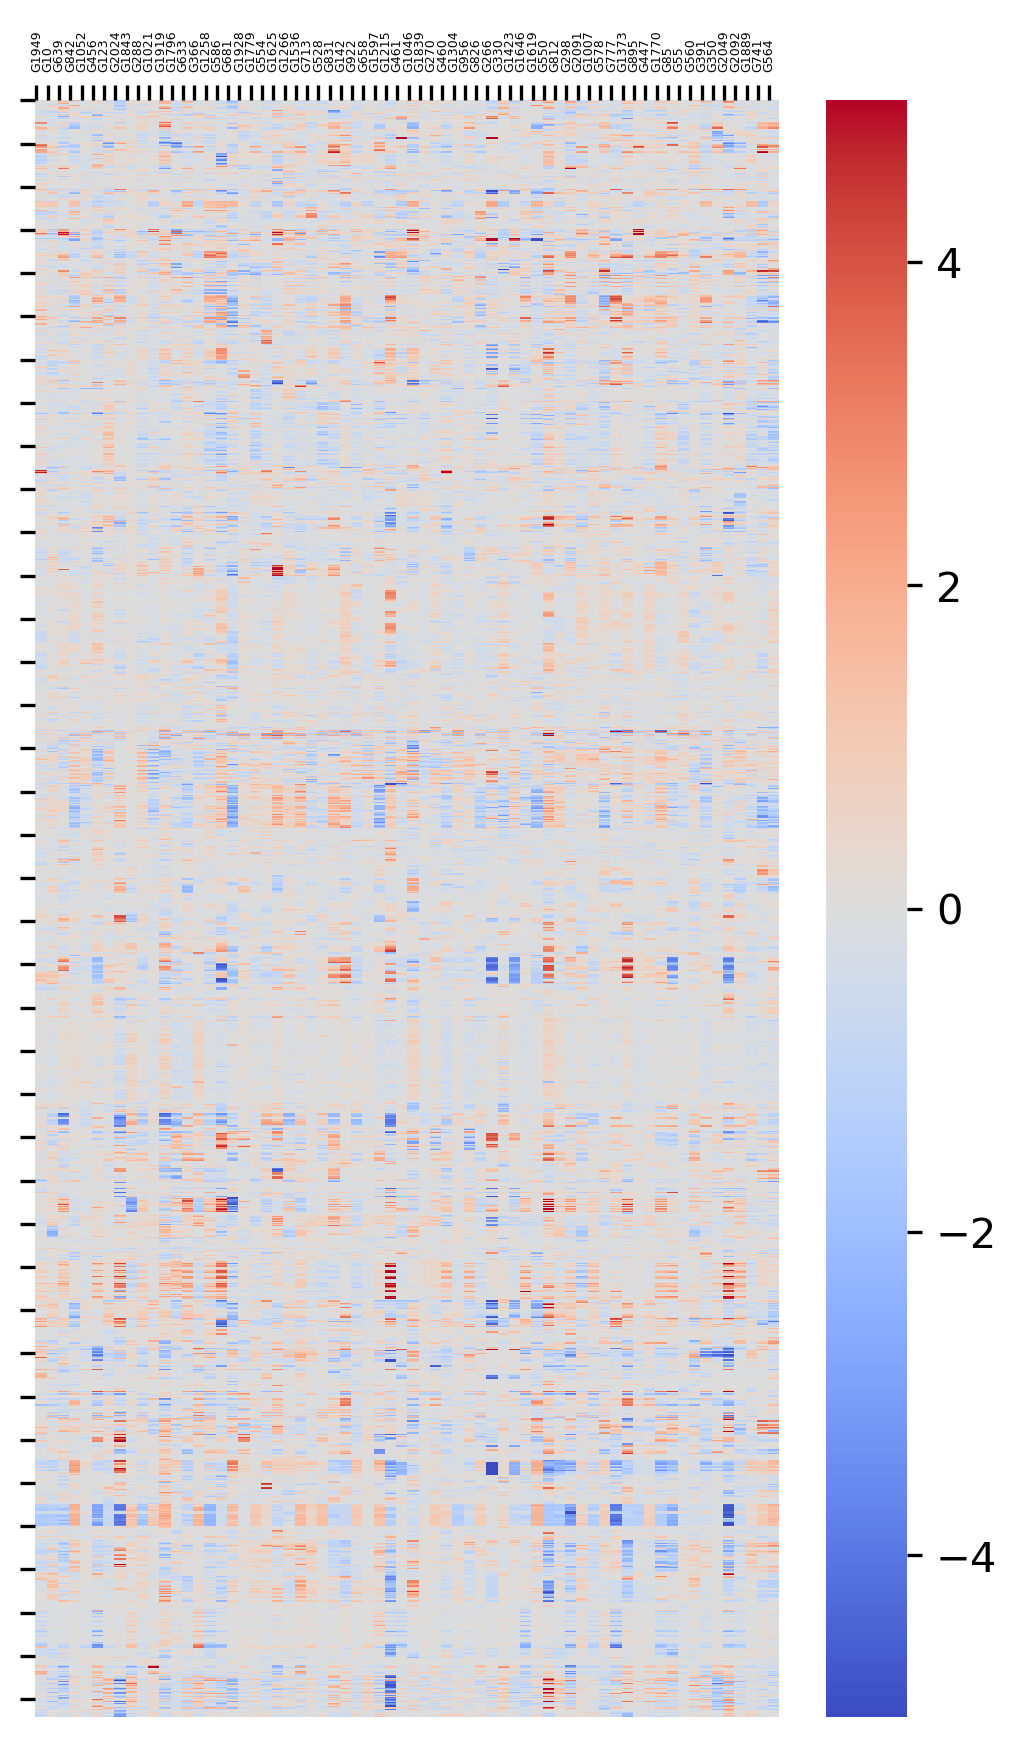

In [147]:
Kid=[GenesE[x] for x in KeggN['eco02020']]
KM=load_submatrixK(matrixE, Kid)

print(np.shape(KM))
PH.HeatmapGenX(KM,'',KeggN['eco02020'],-5,5)

In [148]:
def load_submatrixK(matrix, row_list):
    submatrix = []
    for row_index in row_list:
        row = matrix[row_index]
        submatrix.append(row)
    return submatrix

In [149]:
def load_submatrixD(ExpMat,KeyL):
    MatX={}
    for k in KeyL:
        MatX[k]=ExpMat[k]
    return MatX

In [109]:
figp=f"{filePath}/ecoli_colombos/RESULTFILE/RevFig/".format(Root)
print(figp)

/home/anuphalder/WORK-AKH/BiClustering/ARBic/data//ecoli_colombos/RESULTFILE/RevFig/


In [123]:
kg=random_items(KeggN['eco02020'],len(KeggN['eco02020']))
kegg=load_submatrixD(ExpMat, list(set(kg)))

In [184]:
Ru=RBI[Rtop]#random.sample(RBI[538],len(RBI[538]))
Q2=QBCL[Qtop]#random.sample(QBCL[0],len(QBCL[0]))
Ar=ARCL[Artop]#random.sample(ARCL[267],len(ARCL[267]))
RBM=load_submatrixD(ExpMat, list(set(RBI[538])))
QBM=load_submatrixD(ExpMat, list(set(Q2)))
ARBIC=load_submatrixD(ExpMat, list(set(Ar)))

In [140]:
Keg=random_items(KeggN['eco02020'],len(KeggN['eco02020']))
Kid=[GenesE[x] for x in KeggN['eco02020']]
kegg=load_submatrixD(matrixE, Kid)

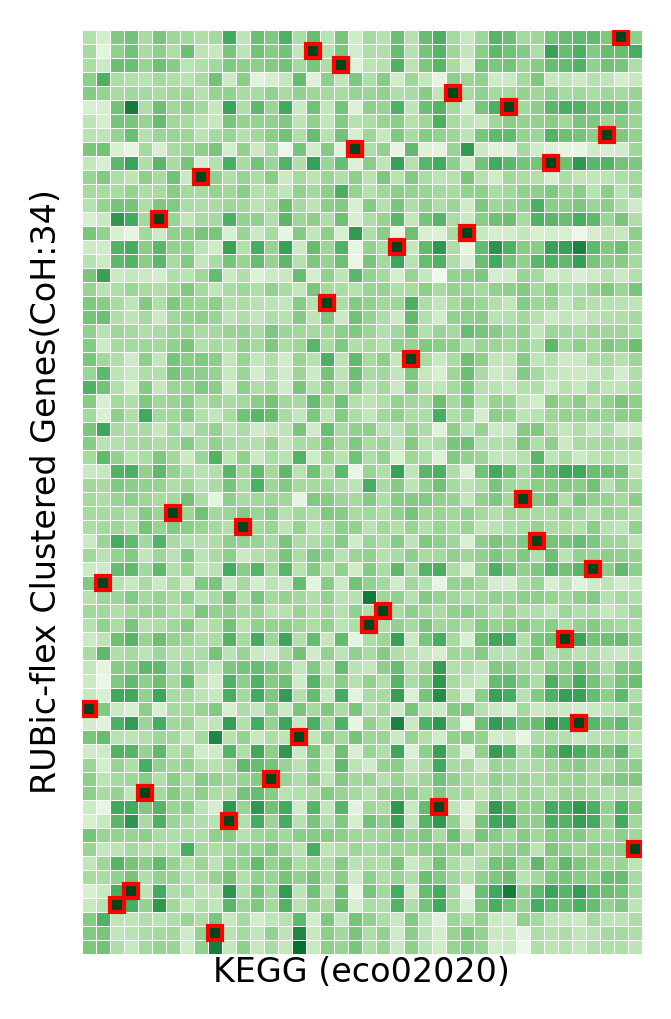

In [153]:

figname=f'{figp}RUBIC'
a,b = 4,3
IC=len(list(set(KeggN['eco02020']) & set(RBI[538])))
plotHtmpRB(RBM, kegg, 'KEGG: eco02020 Genes',f'RUBic-flex Clustered Genes(CoH:{IC})',b,a,figname,border_color='blue')


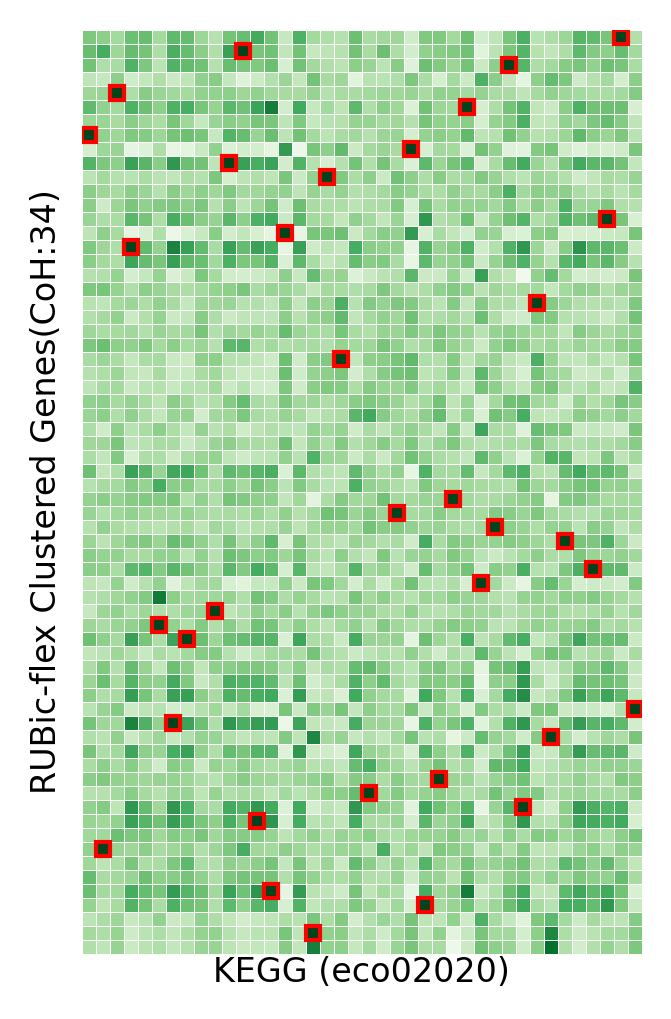

In [387]:
figname=f'{figp}RUBIC'
a,b = 4,3
IC=len(list(set(KeggN['eco02020']) & set(RBI[538])))
plotHtmpRB(RBM, kegg, 'KEGG: eco02020 Genes',f'RUBic-flex Clustered Genes(CoH:{IC})',b,a,figname,border_color='blue')


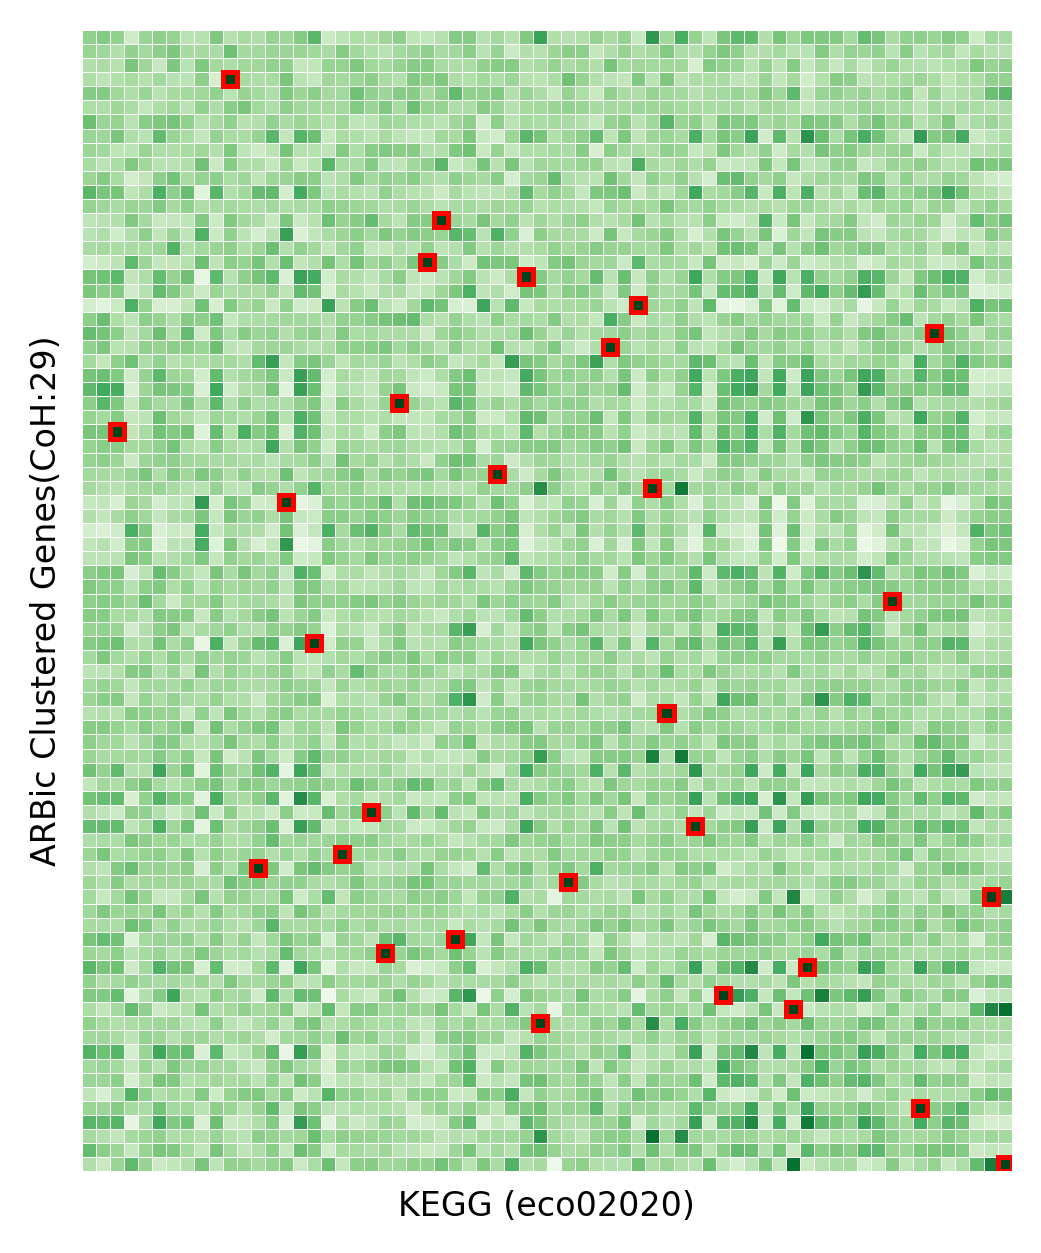

In [177]:
figname=f'{figp}ARBIC'
a,b = 6,4
IC=len(list(set(KeggN['eco02020']) & set(ARCL[267])))
PH.plotHtmp(ARBIC, kegg, 'KEGG: eco02020',f'ARBic Clustered Genes(CoH:{IC})',b,a,figname,border_color='blue')

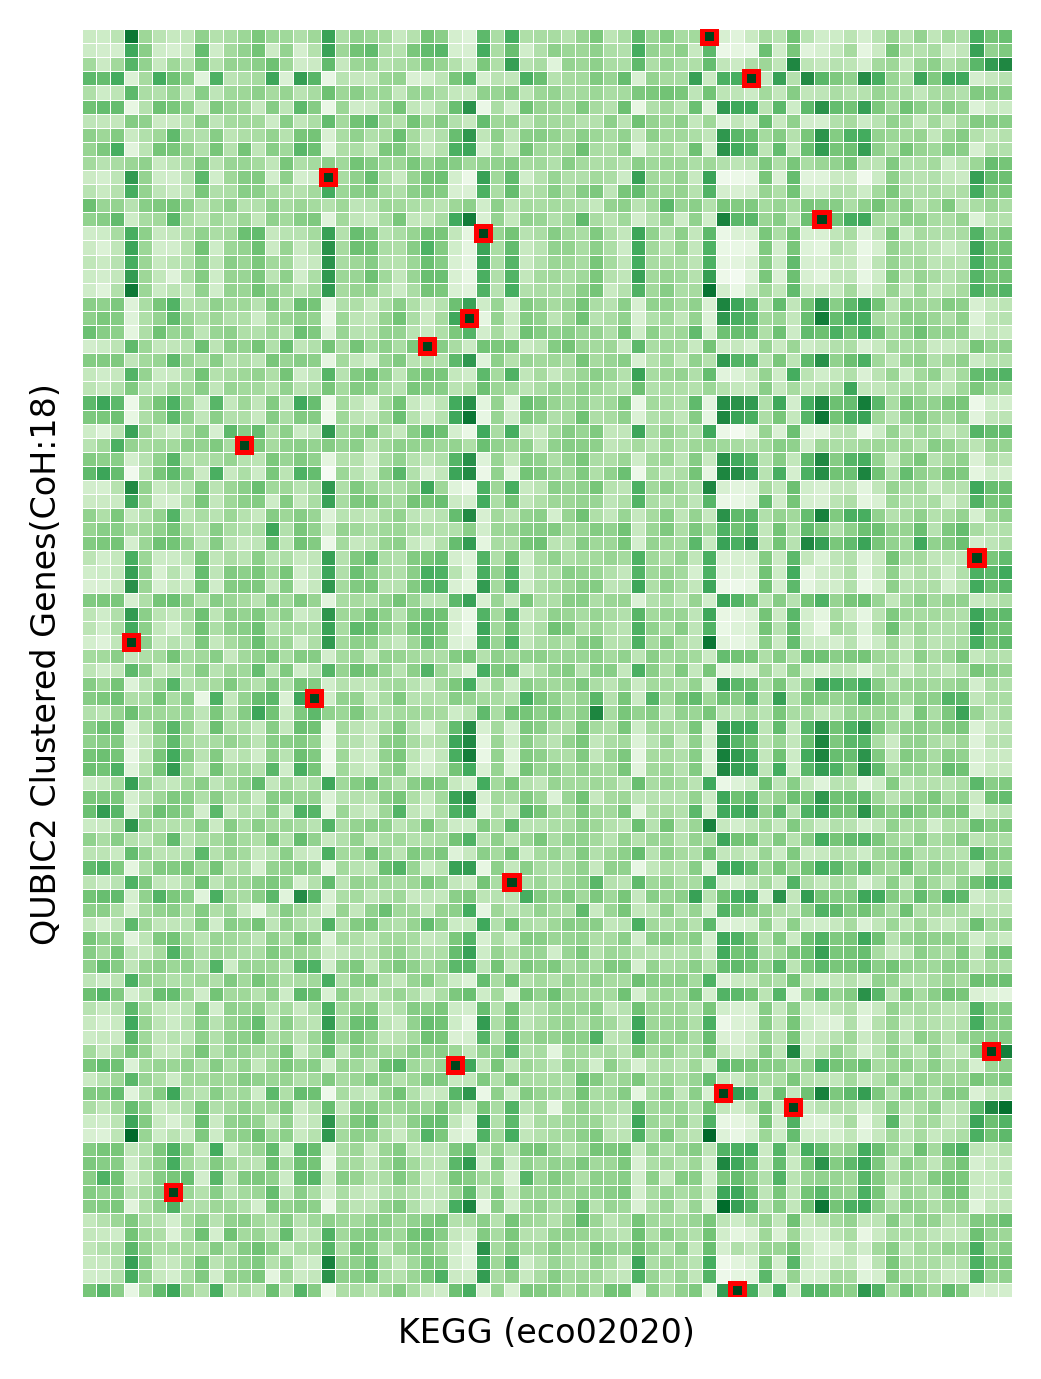

In [186]:
figname=f'{figp}QUBIC2'
a,b = 6,4
IC=len(list(set(KeggN['eco02020']) & set(QBCL[0])))
PH.plotHtmp(QBM, kegg, 'KEGG: eco02020',f'QUBIC2 Clustered Genes(CoH:{IC})',b,a,figname,border_color='blue')

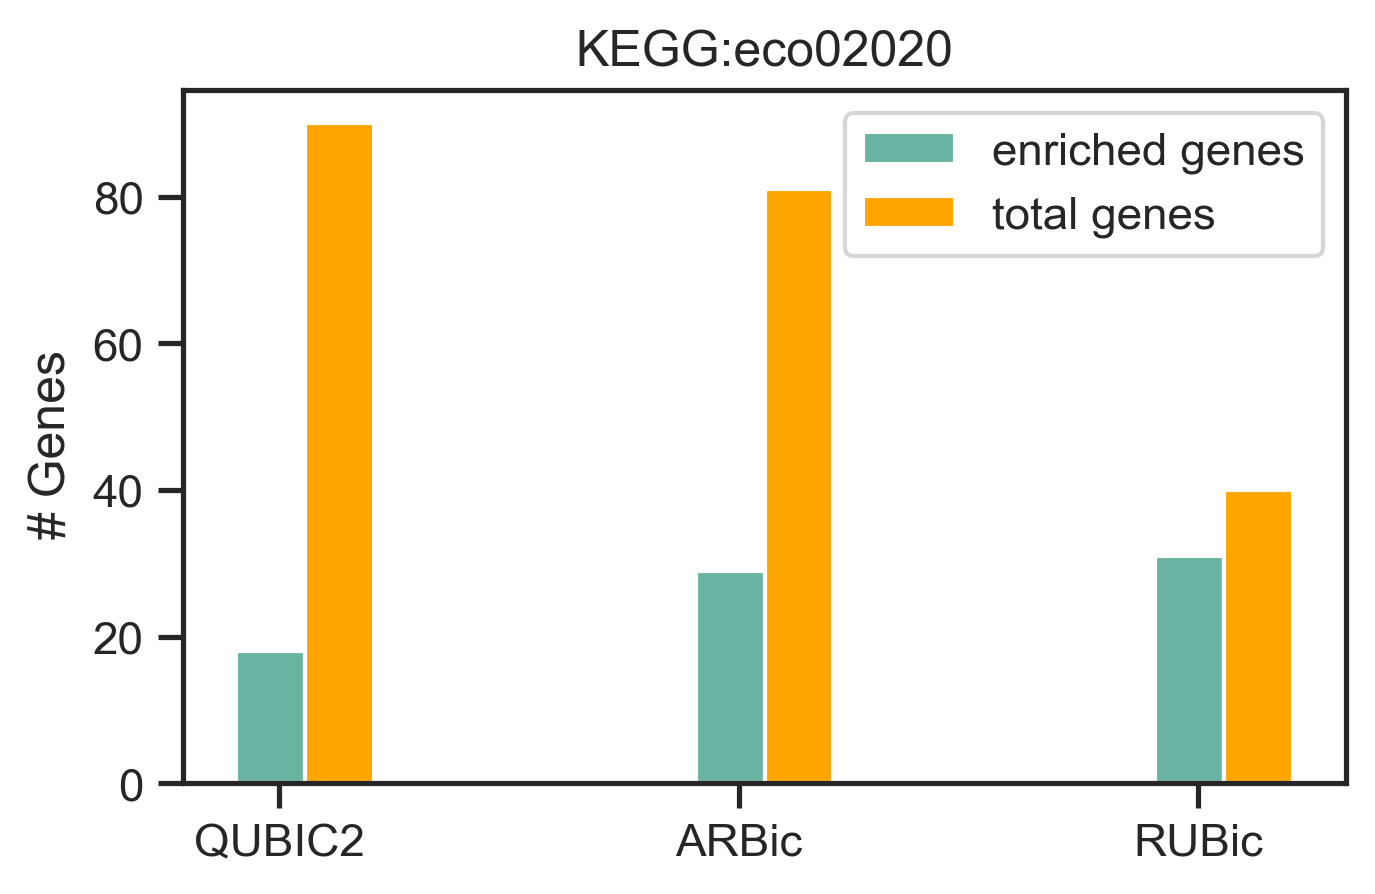

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def draw_grouped_bar_chart(data_dict):
    # Convert the dictionary to lists
    categories = list(data_dict.keys())
    subcategories = list(data_dict[categories[0]].keys())
    values = np.array([[data_dict[category][subcategory] for subcategory in subcategories] for category in categories])

    colors=['#69b3a2','#4374B3']
    colors = ['#69b3a2', 'orange']
    # Set the seaborn style
    sns.set(style="ticks")  #white, dark, whitegrid, darkgrid, ticks
    sns.set_palette(sns.color_palette(colors))

    # Create the bar plot
    plt.figure(figsize=(5, 3),dpi=300)  # Set the figure size
    bar_width = 0.15
    x = np.arange(len(categories))

    for i, subcategory in enumerate(subcategories):
        plt.bar(x + i * bar_width, values[:, i], width=bar_width, label=subcategory)

    # Add labels and title
#     plt.xlabel("bi-clustering")
    plt.ylabel("# Genes ")
    plt.title("KEGG:eco02020")

    # Set x-axis tick labels
    plt.xticks(x + bar_width / 8, categories)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

# Example usage
data = {
    "QUBIC2": {
        'enriched genes': 18,
        'total genes': 90
    },
    "ARBic": {
        'enriched genes': 29,
        'total genes': 81
    },
    "RUBic": {
        'enriched genes': 31,
        'total genes': 40
    }
}

draw_grouped_bar_chart(data)
